In [16]:
#1
!pip install nltk
!pip install PyPDF2
!pip install py-readability-metrics
!pip install wordcloud


NameError: name 'clear' is not defined

In [3]:
#2

import nltk

# Downloading necessary NLTK datasets
nltk.download('vader_lexicon')  
nltk.download('stopwords')
nltk.download('punkt')  



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/prithvi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prithvi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/prithvi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#3.

## News Story Summaries

### Reuters Article Summary
The Reuters article discusses Harvard University President Claudine Gay's intention to correct her dissertation after facing plagiarism allegations. It outlines the situation's background, the university's response, and the challenges Gay faced, including pressure from donors and the community over her comments regarding antisemitism.

### Fox News Article Summary
The Fox News article reports on additional plagiarism charges against Claudine Gay, highlighting over 40 new allegations. It focuses on the verification of these allegations, the response from Harvard Corporation, and support for Gay from the NAACP, suggesting political motives behind the criticism.

Both articles provide different perspectives on the same event, showcasing the issue's complexity and the varied reactions from the community and media.


In [4]:
#4

import PyPDF2

def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ''
        for page in pdf_reader.pages:
            text += page.extract_text() + '\n'  # Extract text from each page
        return text

# Example usage
file_path_1 = 'reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf'
file_path_2 = 'foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf'

text_1 = extract_text_from_pdf(file_path_1)
text_2 = extract_text_from_pdf(file_path_2)

print("Text from the first news story:\n", text_1)
print("Text from the second news story:\n", text_2)


Text from the first news story:
 1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing Rights
Dec 21 (Reuters) - Harvard University's president was planning to submit three corrections to
her 1997 dissertation after a committee investigating plagiarism allegations against her found
that she had made citation errors, a university spokesperson said.
Claudine Gay , who was inaugurated as Harvard's president in September , has already
submitted corrections to two published articles in recent weeks that were the focus of a
review by the Harvard Corporatio

#4
## Observations
Headings, Page numbers and Urls are also read from the PDF document.

In [5]:
#5

from nltk.sentiment import SentimentIntensityAnalyzer



def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

sentiment_1 = analyze_sentiment(text_1)
sentiment_2 = analyze_sentiment(text_2)

print("Sentiment Analysis for the first news story:", sentiment_1)
print("Sentiment Analysis for the second news story:", sentiment_2)


Sentiment Analysis for the first news story: {'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}
Sentiment Analysis for the second news story: {'neg': 0.064, 'neu': 0.863, 'pos': 0.073, 'compound': 0.8346}


## Overall, I think that the analysis from reading the articles resonates with the sentiment analysis. The first article has a high negative score which is in the line with the content of the article based on the accusatory tone. However, in the second article the same message is conveyed in a less of an accusatory tone.

In [6]:
#6

from nltk.sentiment import SentimentIntensityAnalyzer

Heading_1 = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"

Heading_2 = "Harvard president will submit dissertation edits after plagiarism allegations"

def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

sentiment_3 = analyze_sentiment(Heading_1)
sentiment_4 = analyze_sentiment(Heading_2)

print("Sentiment Analysis for the first heading:", sentiment_3)
print("Sentiment Analysis for the second heading:", sentiment_4)

Sentiment Analysis for the first heading: {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}
Sentiment Analysis for the second heading: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


## 6
## The headlines seems to be represented correctly in the sentiment analysis where first article was directly acusatory and negative compared to the second article which  gave her the benefit of the doubt being neutral.

In [7]:
!pip install py-readability-metrics

In [8]:
#7

from readability import Readability

r = Readability(text_1)
r1 = Readability(text_2)

In [11]:
fk = r.flesch_kincaid()
print("Article 1 Score=", fk.score)
print("Article 1 Grade Level=", fk.grade_level)

fk1 = r1.flesch_kincaid()
print("Article 2 Score=", fk1.score)
print("Articel 2 Grade level=", fk1.grade_level)

print("Article 1 has a lower grade level compared to Article 2. However both require a college graduate level of education")

Article 1 Score= 18.02006831424553
Article 1 Grade Level= 18
Article 2 Score= 19.21912993097889
Articel 2 Grade level= 19
Article 1 has a lower grade level compared to Article 2. However both require a college graduate level of education


In [12]:
f = r.flesch()
print("Article 1 Score=",f.score)
print("Article 1 Ease=", f.ease)
print("Articel Grade Level=",f.grade_levels)

f1 = r1.flesch()
print("Article 2 Score=",f1.score)
print("Article 2 Ease=",f1.ease)
print("Articel Grade Level=",f1.grade_levels)

print("Article 1 has a lower score compared to Article 2. However both require a college graduate level of education")


Article 1 Score= 18.384675005023126
Article 1 Ease= very_confusing
Articel Grade Level= ['college_graduate']
Article 2 Score= 21.41115320671068
Article 2 Ease= very_confusing
Articel Grade Level= ['college_graduate']
Article 1 has a lower score compared to Article 2. However both require a college graduate level of education


In [15]:
ari = r.ari()
print("Article 1 Score=", ari.score)
print("Article 1 Grade Level=", ari.grade_levels)
print("Article Ages=", ari.ages)

ari1 = r1.ari()
print("Article 2 Score=", ari1.score)
print("Article 2 Grade Level=",ari1.grade_levels)
print("Article 2 Ages=",ari1.ages)

Article 1 Score= 19.525234076753065
Article 1 Grade Level= ['college_graduate']
Article Ages= [24, 100]
Article 2 Score= 21.36114766486977
Article 2 Grade Level= ['college_graduate']
Article 2 Ages= [24, 100]


In [37]:
#8

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

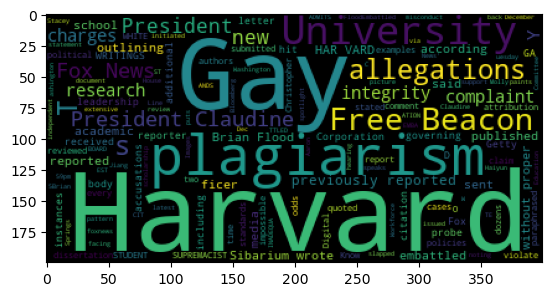

In [39]:
cloud = WordCloud(stopwords=STOPWORDS).generate(text_1)
plt.imshow(cloud);

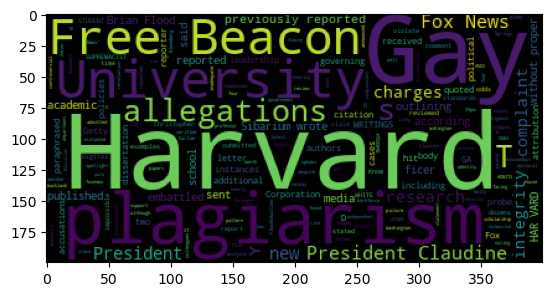

In [40]:
cloud1 = WordCloud(stopwords=STOPWORDS).generate(text_2)
plt.imshow(cloud1);

# Comments on the WordCloud
There are a lot of common words. One of the most repeated ones is the name of the President and the University. Plagarism is another word which is repeated often in both the documents. The first one has many more accusatory words like integrity, complaint. 